In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.stats import linregress

# File paths
player_shooting_path = "../csv/player_shooting.csv"
player_stats_path = "../csv/player_stats.csv"
player_playing_path ="../csv/player_playingtime.csv"

# Read CSV files
player_stats_df = pd.read_csv(player_stats_path)
player_shooting_df = pd.read_csv(player_shooting_path)
player_playing_df = pd.read_csv(player_playing_path)

In [14]:
player_stats_clean = player_stats_df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,22,24]].copy()

In [15]:
player_shooting_clean = player_shooting_df.iloc[:,[0,7,8,9,10,12]].copy()

In [16]:
player_playing_clean = player_playing_df.iloc[:,[0,7, 11,13]].copy()
list(player_playing_clean)

['player', 'minutes_per_game', 'minutes_per_start', 'games_subs']

In [17]:
# Merge dataframes using the 'player' column as the common key
merged_df = pd.merge(player_stats_clean, player_shooting_clean, on="player", how="inner")
merged_df = pd.merge(merged_df, player_playing_clean, on="player", how="inner")


# Save the merged dataframe to a new CSV file
merged_df.to_csv("merged_player_data.csv", index=False)

# Display the merged dataframe
merged_df_complete = pd.DataFrame(merged_df)
merged_df_complete

,player,position,team,age,club,birth_year,games,games_starts,minutes,minutes_90s,...,xg,xg_assist,shots,shots_on_target,shots_on_target_pct,shots_per90,goals_per_shot,minutes_per_game,minutes_per_start,games_subs
0,Aaron Mooy,MF,Australia,32-094,Celtic,1990,4,4,360,4.0,...,0.0,0.1,1,0,0.0,0.25,0.00,90.0,90.0,0
1,Aaron Ramsey,MF,Wales,31-357,Nice,1990,3,3,266,3.0,...,0.0,0.0,1,0,0.0,0.34,0.00,89.0,89.0,0
2,Abdelhamid Sabiri,MF,Morocco,26-020,Sampdoria,1996,5,2,181,2.0,...,0.1,0.9,3,0,0.0,1.49,0.00,36.0,55.0,3
3,Abdelkarim Hassan,DF,Qatar,29-112,Al Sadd SC,1993,3,3,270,3.0,...,0.3,0.0,6,0,0.0,2.00,0.00,90.0,90.0,0
4,Abderrazak Hamdallah,FW,Morocco,32-001,Al-Ittihad,1990,4,0,68,0.8,...,0.4,0.0,2,1,50.0,2.65,0.00,17.0,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,Ángel Di María,MF,Argentina,34-307,Juventus,1988,5,4,288,3.2,...,0.8,0.6,6,3,50.0,1.87,0.17,58.0,70.0,1
676,Ángelo Preciado,DF,Ecuador,24-303,Genk,1998,3,3,264,2.9,...,0.1,0.4,4,0,0.0,1.36,0.00,88.0,88.0,0
677,Éder Militão,DF,Brazil,24-334,Real Madrid,1998,4,4,347,3.9,...,0.2,0.0,5,1,20.0,1.30,0.00,87.0,87.0,0
678,Óscar Duarte,DF,Costa Rica,33-198,Al-Wehda,1989,3,3,270,3.0,...,0.0,0.3,0,0,NaN,0.00,NaN,90.0,90.0,0


In [18]:
# Calculate total goals per team 
total_goals_per_team = merged_df_complete.groupby('team')['goals'].sum()

# Convert SeriesGroupBy to df
total_goals_per_team = total_goals_per_team.reset_index()

# Rename column to show results 
total_goals_per_team = total_goals_per_team.rename(columns={'goals': 'total goals per team'})

# Display the result
print(total_goals_per_team)


              team  total goals per team
0        Argentina                    15
1        Australia                     3
2          Belgium                     1
3           Brazil                     8
4         Cameroon                     4
5           Canada                     1
6       Costa Rica                     3
7          Croatia                     8
8          Denmark                     1
9          Ecuador                     4
10         England                    13
11          France                    16
12         Germany                     6
13           Ghana                     5
14         IR Iran                     4
15           Japan                     5
16  Korea Republic                     5
17          Mexico                     2
18         Morocco                     6
19     Netherlands                    10
20          Poland                     3
21        Portugal                    12
22           Qatar                     1
23    Saudi Arab

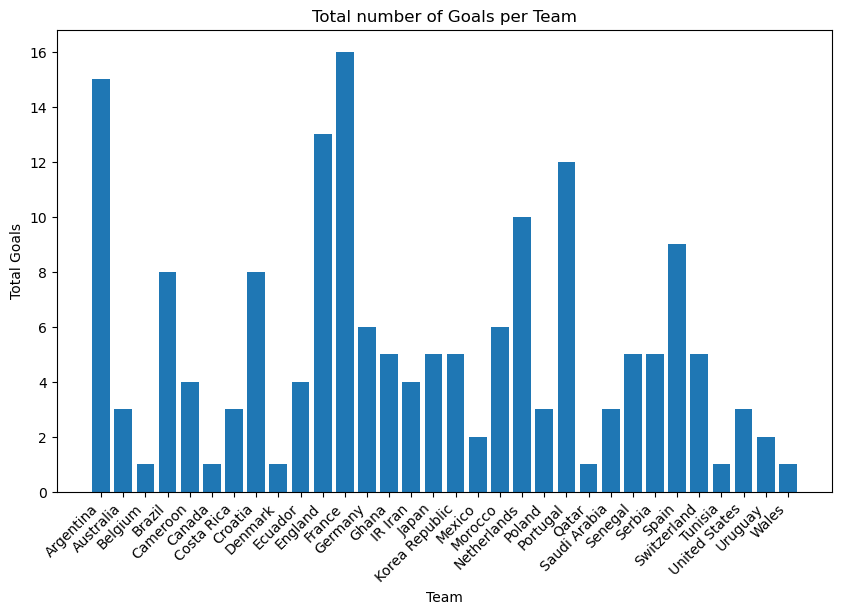

In [19]:
#plot the data via bar graph
plt.figure(figsize=(10, 6))
plt.bar(total_goals_per_team['team'], total_goals_per_team['total goals per team'])
plt.title('Total number of Goals per Team')
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.xticks(rotation=45, ha='right') 
plt.show()


In [20]:
# Calculate total assists per team 
total_assists_per_team = merged_df_complete.groupby('team')['assists'].sum()

# Convert SeriesGroupBy to df
total_assists_per_team = total_assists_per_team.reset_index()

# Rename column to show results 
total_assists_per_team = total_assists_per_team.rename(columns={'assists':'total assists per team'})

# Display the result
print(total_assists_per_team)

              team  total assists per team
0        Argentina                       8
1        Australia                       3
2          Belgium                       1
3           Brazil                       6
4         Cameroon                       4
5           Canada                       1
6       Costa Rica                       1
7          Croatia                       8
8          Denmark                       1
9          Ecuador                       2
10         England                      11
11          France                      12
12         Germany                       5
13           Ghana                       2
14         IR Iran                       2
15           Japan                       4
16  Korea Republic                       3
17          Mexico                       1
18         Morocco                       4
19     Netherlands                       8
20          Poland                       1
21        Portugal                      10
22         

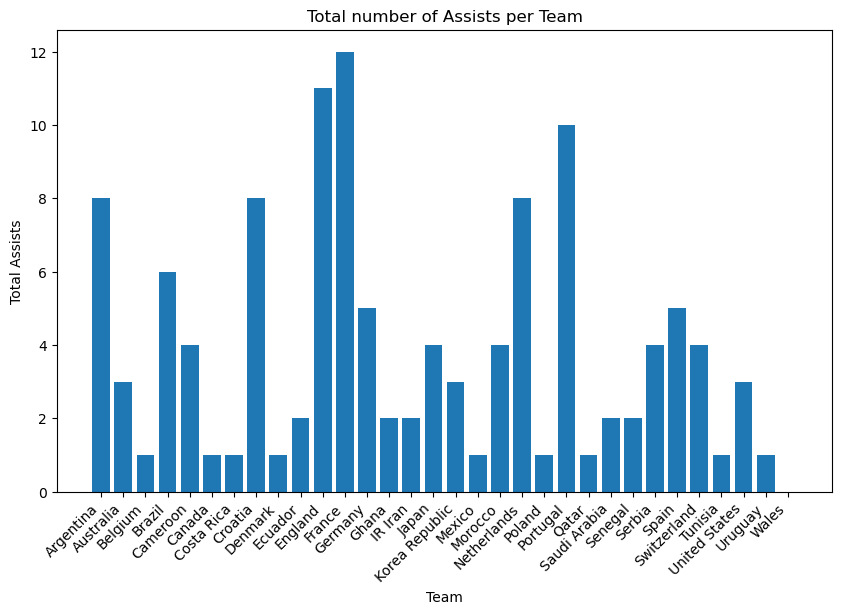

In [21]:
#plot the data via bar graph
plt.figure(figsize=(10, 6))
plt.bar(total_assists_per_team['team'], total_assists_per_team['total assists per team'])
plt.title('Total number of Assists per Team')
plt.xlabel('Team')
plt.ylabel('Total Assists')
plt.xticks(rotation=45, ha='right') 
plt.show()

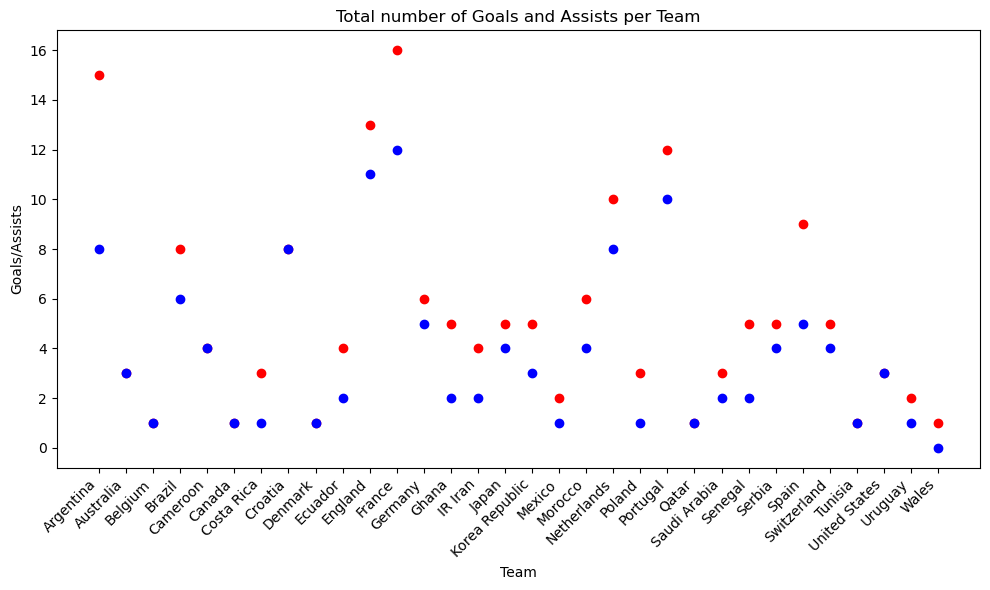

In [22]:
plt.figure(figsize=(10, 6))

teams = total_goals_per_team['team'].unique()

# Plotting total goals and total assists for each team
for team in teams:
    goals_data = total_goals_per_team[total_goals_per_team['team'] == team]
    assists_data = total_assists_per_team[total_assists_per_team['team'] == team]

    plt.plot(goals_data['team'], goals_data['total goals per team'], label=f'{team} - Total Goals', marker='o', color='red')
    plt.plot(assists_data['team'], assists_data['total assists per team'], label=f'{team} - Total Assists', marker='o', color='blue')

plt.title('Total number of Goals and Assists per Team')
plt.xlabel('Team')
plt.ylabel('Goals/Assists')

# Combine both legends into a single legend


plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [23]:
# Calculate summary statistics for each team
team_summary = merged_df_complete.groupby('team').agg({
    'games_starts': 'sum',
    'minutes': 'sum'})

team_summary['Starters_per_team'] = team_summary['minutes'] / 90
team_summary['Starters_per_team'] = team_summary['Starters_per_team'].round()

print("Summary Statistics for Each Team:")
print(team_summary)


Summary Statistics for Each Team:
                games_starts  minutes  Starters_per_team
team                                                    
Argentina                 77     7590               84.0
Australia                 44     3960               44.0
Belgium                   33     2970               33.0
Brazil                    55     5280               59.0
Cameroon                  33     2969               33.0
Canada                    33     2970               33.0
Costa Rica                33     2970               33.0
Croatia                   77     7590               84.0
Denmark                   33     2970               33.0
Ecuador                   33     2970               33.0
England                   55     4950               55.0
France                    77     7260               81.0
Germany                   33     2970               33.0
Ghana                     33     2970               33.0
IR Iran                   33     2970               33

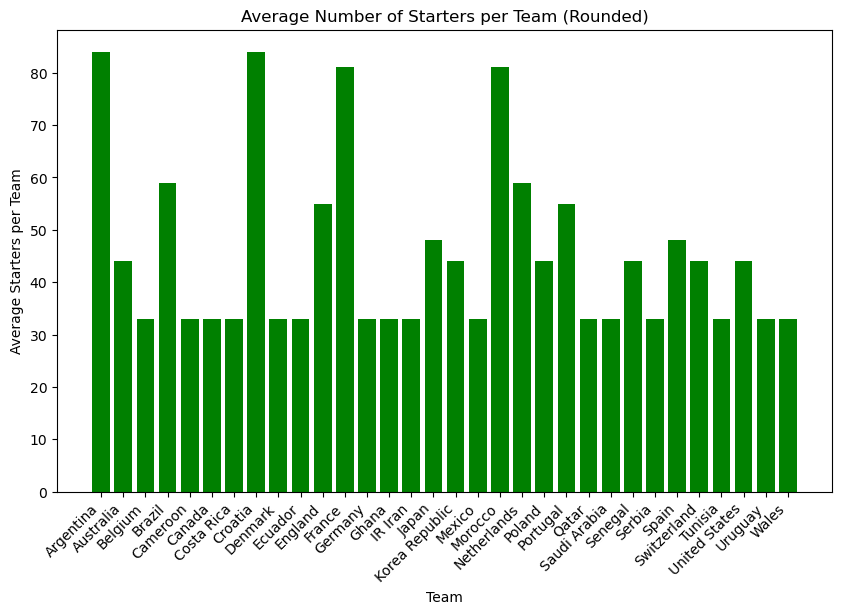

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(team_summary.index, team_summary['Starters_per_team'], color='green')
plt.title('Average Number of Starters per Team (Rounded)')
plt.xlabel('Team')
plt.ylabel('Average Starters per Team')
plt.xticks(rotation=45, ha='right')
plt.show()